In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
import csv
import re
%matplotlib inline

In [2]:
df = pd.read_csv('GameData.csv',header = 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16991 entries, 0 to 16990
Data columns (total 16 columns):
Name               16988 non-null object
Platform           16990 non-null object
Year_of_Release    16721 non-null object
Genre              16988 non-null object
Publisher          16933 non-null object
NA_Sales           16990 non-null float64
EU_Sales           16990 non-null float64
JP_Sales           16990 non-null float64
Other_Sales        16990 non-null float64
Global_Sales       16988 non-null float64
Critic_Score       8250 non-null float64
Critic_Count       8250 non-null float64
User_Score         10148 non-null object
User_Count         7705 non-null float64
Developer          10232 non-null object
Rating             10080 non-null object
dtypes: float64(8), object(8)
memory usage: 2.1+ MB


In [5]:

#Add sequel column


class Game:
    def __init__(self, name, platform, year, genre, publisher):
        self.name = name
        self.platform = platform
        self.year = year
        self.genre = genre
        self.publisher = publisher
        self.sequel = False
        
    def __repr__(self):
        return "Game(" + self.name + ")"
            
    def __str__(self):
        return "Game():" + "\n\tname=" + self.name + "\n\tplatform=" + self.platform + \
                "\n\tyear=" + str(self.year) + "\n\tgenre=" + self.genre + "\n\tpublisher=" + self.publisher

def isSequel(game, games):
    name = game.name.strip()
    # Does the game have a number at the end?
    pattern = re.compile(r'\s\d*$|\s[IVX]$') # Match any number or roman numeral at the end of the game name
    match = pattern.search(name)
    if match:
        return 1
        #print ("'" + name + "' may be a sequel because of number at end")

    # Does the name of the game match the name of any other earlier games?
    for othergame in games:
        othername = othergame.name.strip()
        if len(name) >= len(othername):
            if othername in name and game != othergame:
                if game.year > othergame.year and game.platform == othergame.platform:
                    #print ("'" + name + " (" + game.year + ")' may be a sequel of '" + othername + " (" + othergame.year + ")'")
                    return 1
            elif othername.split(':')[0] == name.split(':')[0] and game != othergame:
                if game.year > othergame.year and game.platform == othergame.platform:
                    #print ("'" + name + " (" + game.year + ")' may be a sequel of '" + othername + " (" + othergame.year + ")'")
                    return 1

    return 0
df = pd.read_csv('GameData.csv',header = 0)
reader = csv.reader(open('GameData.csv'))
next(reader, None) # Skip the headers
games = [Game(row[0], row[1], row[2], row[3], row[4]) for row in reader]
for game in games:
    game.sequel = isSequel(game, games)
Sequel = []
for game in games:
    Sequel.append(game.sequel)
df['Sequel']=Sequel
df.to_csv('data_sequel_with_number.csv')




In [31]:
df = pd.read_csv('data_sequel.csv')
df['Year_of_Release'] = df['Year_of_Release'].convert_objects(convert_numeric= True)
df['User_Score'] = df['User_Score'].convert_objects(convert_numeric= True)
def is_1mi(x):
    if x>=1:
        return 1
    else:
        return 0
drop the 
df['Million'] = df['Global_Sales']
df.drop('Global_Sales', axis=1, inplace=True)
df['Million'] = df['Million'].apply(lambda x:is_1mi(x))
# Classify games by whether it's global sales exceed 1 million

df = df[['Platform', 'Year_of_Release', 'Genre', 'Publisher','Critic_Score', 'Critic_Count','Developer', 'Rating', 'Sequel', 'Million']]
df = df[pd.notnull(df['Year_of_Release'])]
df['Year_of_Release']  = df['Year_of_Release'].astype('int64') 
#  convert Year_of_Release to int and drop nan values

df = df[-df['Rating'].isin(['AO','EC','K-A','RP'])]

# Data for AO, EC K-A, RP is very sparse. So for precision we drump them from data.
top40 = df['Developer'].value_counts().iloc[:40].index.tolist()
def is_top40(Developer):
    if Developer in top40:
        return 1
    else:
        return 0 
df['Top_Developer'] = df['Developer'].map(is_top40)
# TOP 40 Developer's game average sale is almost twice over the rest of developer's 
# So We divided them by top 40 and others

df = df.dropna().reset_index(drop=True)

C:\Users\lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df_after = df_sub[df_sub['Year_of_Release']>2000]

In [18]:
df_after

,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,Developer,Rating,Sequel,Million,Top_Developer
0,Wii,2006,Sports,Nintendo,76.0,51.0,Nintendo,E,0,1,1
2,Wii,2008,Racing,Nintendo,82.0,73.0,Nintendo,E,0,1,1
3,Wii,2009,Sports,Nintendo,80.0,73.0,Nintendo,E,1,1,1
6,DS,2006,Platform,Nintendo,89.0,65.0,Nintendo,E,0,1,1
7,Wii,2006,Misc,Nintendo,58.0,41.0,Nintendo,E,0,1,1
8,Wii,2009,Platform,Nintendo,87.0,80.0,Nintendo,E,0,1,1
10,DS,2005,Simulation,Nintendo,NaN,NaN,NaN,NaN,0,1,0
11,DS,2005,Racing,Nintendo,91.0,64.0,Nintendo,E,0,1,1
13,Wii,2007,Sports,Nintendo,80.0,63.0,Nintendo,E,0,1,1
14,X360,2010,Misc,Microsoft Game Studios,61.0,45.0,Good Science Studio,E,0,1,0


In [17]:
df2 = pd.read_csv('GameData.csv',header = 0)
df2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
Rest_Developers = np.mean(df2.groupby(['Developer']).Global_Sales.mean()[df2.Developer.value_counts().iloc[40:].index])

In [21]:
Top40_Developers = np.mean(df2.groupby(['Developer']).Global_Sales.mean()[df2.Developer.value_counts().iloc[:40].index])

([<matplotlib.axis.XTick at 0x2429073c9b0>,
 <a list of 2 Text xticklabel objects>)

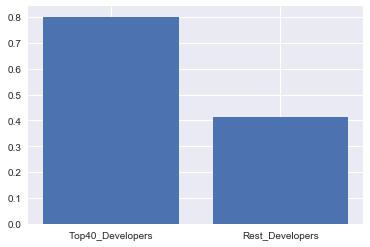

In [32]:
a = [Top40_Developers,Rest_Developers]


In [48]:
a = [df[df['Sequel'] == 1]['Global_Sales'].mean(),df[df['Sequel'] == 0]['Global_Sales'].mean()]

([<matplotlib.axis.XTick at 0x2428e315f28>,
 <a list of 2 Text xticklabel objects>)

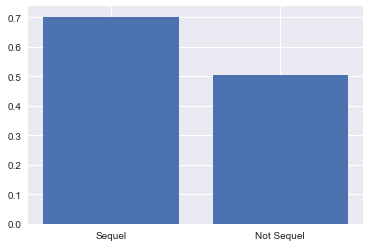

In [50]:
x = [0,1]
plt.bar(x,a)
plt.xticks((0, 1), ('Sequel', 'Not Sequel'))

In [56]:
df_after = df_after[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Critic_Score',
       'Critic_Count', 'Developer', 'Rating', 'Sequel', 
       'Top_Developer','Million']]

In [58]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 16990
Data columns (total 11 columns):
Platform           14383 non-null object
Year_of_Release    14383 non-null int64
Genre              14383 non-null object
Publisher          14348 non-null object
Critic_Score       7855 non-null float64
Critic_Count       7855 non-null float64
Developer          9774 non-null object
Rating             9636 non-null object
Sequel             14383 non-null int64
Top_Developer      14383 non-null int64
Million            14383 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 1.3+ MB
